In [1]:
import pandas
import csv
import numpy as np
import pylab as pl
from scipy.stats import linregress
from scipy import stats  as S
%matplotlib inline

In [2]:
def rankorder(x):
	x1 = list(np.sort(x))
	x1.reverse()
	y1 = range(1,len(x1)+1)
	return np.array(x1),np.array(y1)

In [3]:
def binning(x,y,bins,log_10=False,confinter=5):
    '''makes a simple binning'''

    x = np.array(x);y = np.array(y)

    if isinstance(bins,int) or isinstance(bins,float):
        bins = np.linspace(np.min(x)*0.9,np.max(x)*1.1,bins)
    else:
        bins = np.array(bins)

    if log_10:
        bins = bins[bins>0]
        c = x > 0
        x = x[c]
        y = y[c]
        bins = np.log10(bins)
        x = np.log10(x)
        y = np.log10(y)

    Tbins = []
    Median = []
    Mean = []
    Sigma =[]
    Perc_Up = []
    Perc_Down = []
    Points=[]


    for i,ix in enumerate(bins):
        if i+2>len(bins):
            break

        c1 = x >= ix
        c2 = x < bins[i+1]
        c=c1*c2

        if len(y[c])>0:
            Tbins = np.append(Tbins,np.median(x[c]))
            Median =  np.append(Median,np.median(y[c]))
            Mean = np.append(Mean,np.mean(y[c]))
            Sigma = np.append(Sigma,np.std(y[c]))
            Perc_Down = np.append(Perc_Down,np.percentile(y[c],confinter))
            Perc_Up = np.append(Perc_Up,np.percentile(y[c],100 - confinter))
            Points = np.append(Points,len(y[c]))


    return {'bins' : Tbins,
            'median' : Median,
            'mean' : Mean,
            'stdDev' : Sigma,
            'percDown' :Perc_Down,
            'percUp' :Perc_Up,
            'nPoints' : Points}

### [in fact, at each submission, we observe the outcome of a (multiplicative?) process which leads to a power law distribution of coarse-grained increments between k and k+1]


In [4]:
fig_width_pt = 420.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27  # Convert pt to inch
golden_mean = (np.sqrt(5) - 1.0) / 2.0  # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width  # *golden_mean      # height in inches
fig_size = [fig_width, fig_height]

params = {'backend': 'ps',
          'axes.labelsize': 25,
          'text.fontsize': 32,
          'legend.fontsize': 18,
          #'title.fontsize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'text.usetex': False,
          'figure.figsize': fig_size}
pl.rcParams.update(params)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
dir = "/Users/maithoma/github/bayesLearn/scripts/"

In [6]:
simplName = "simpleConvergenceMeans"
complName = "complexConvergenceMeans"

In [48]:
simpl = open(dir + "Data/simpleConvergenceMeans.csv",'rb').read().split(",")
compl = open(dir + "Data/complexConvergenceMeans.csv",'rb').read().split(",")
learn13 = open(dir + "Data/person13Learning.csv",'rb').read().split("\n")
explor = open(dir + "Data/exploration.csv",'rb').read().split("\n")


for l,line in enumerate(learn13):
    #print line.split(",")
    try:
        learn13[l] = map(float,line.split(","))
    except:
        print line
        
learn13 = np.array(learn13)

dfSimpleLearning = pandas.DataFrame.from_csv(dir + "Data/simple_distances.csv")#simple 
dfComplexLearning = pandas.DataFrame.from_csv(dir + "Data/complex_distances_2.csv")# complex

dfExplor = pandas.DataFrame.from_csv(dir + "Data/exploration.csv")
dfExplor = dfExplor[:-1]

#df = dfAllLearning
#df.index = map(int,df.index)

In [9]:
simpleArray = np.array(dfSimpleLearning)

### Exploration versus Performance

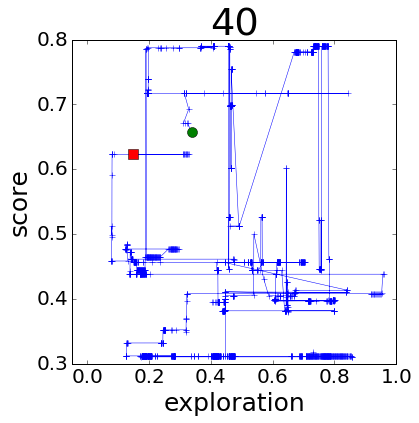

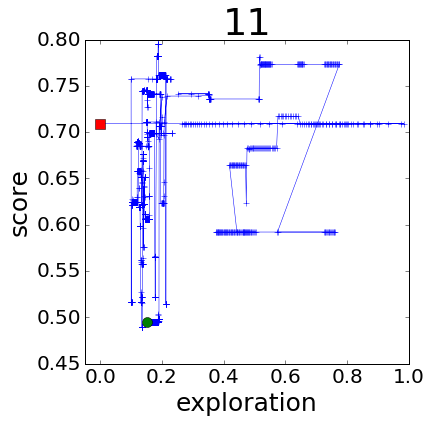

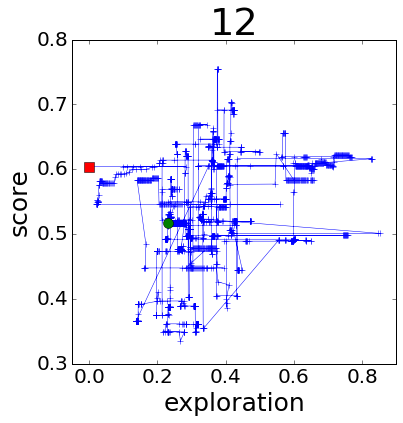

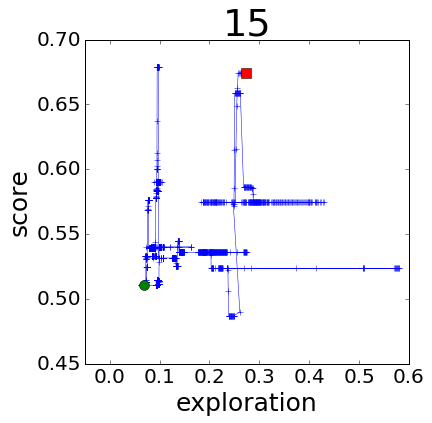

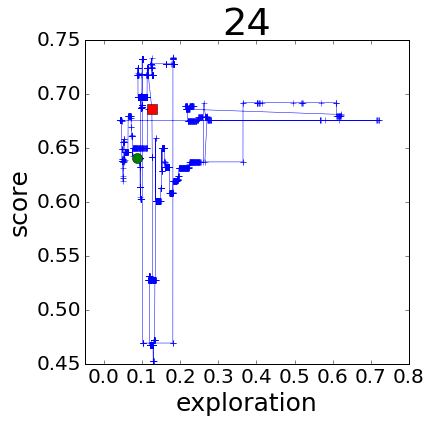

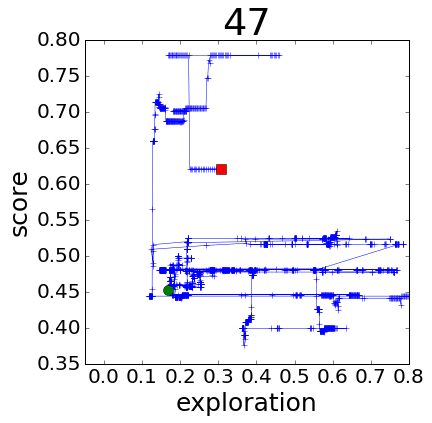

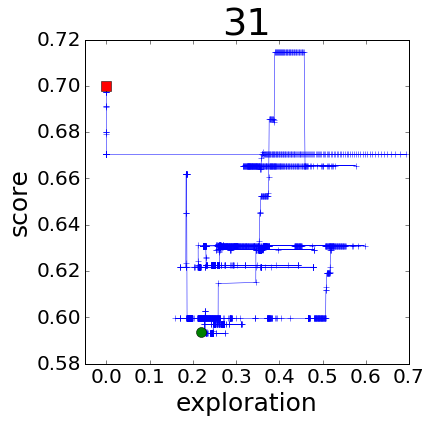

In [33]:
for i in range(48):
    score = dfAllLearning[str(i)].values[:]
    explor = dfExplor[str(i+1)].values[:]
    
    c = (~np.isnan(score))*(~np.isnan(explor))
    
    if i in [11,12,15,24,31,40,47]:
    #if i in np.arange(47,48):
        pl.figure(i)
        pl.title(i)
        pl.plot(explor[c],score[c],'+-',lw=0.5)
        pl.plot(explor[c][0],score[c][0],'rs',ms=10)
        pl.plot(explor[c][-1],score[c][-1],'go',ms=10)
        #break
        
        pl.xlabel("exploration")
        pl.ylabel("score")
        pl.xlim(xmin = -0.05)
        
        pl.savefig(dir + "Figures/score_explor_walk_%s.eps"%i)

### Explore vicinity of new information

* stack the minute before : look at perturbations
* stack the minute after : look at perturbations


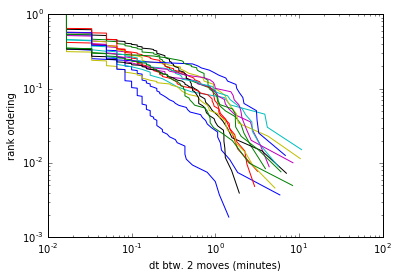

In [8]:
DF = []
#pl.figure(1,(15,10))
#pl.figure(3,(9,8))

for i in range(48):
    values = df[str(i)].values[:]
    values = values[np.invert(np.isnan(values))]
    DF = np.append(DF,np.diff(values))#/values[:-1])
    minimum = min(values[-50:])
    #print i,minimum
    #if minimum <= 0.30:
    
    x = df[str(i)].index[:-1]/60.
    y = np.diff(df[str(i)])
      
    if i==[11,12,15,24,31,40][5]:
        #pl.plot(df[str(i)],label=str(i))
        
        #pl.figure(1)
        cPlus = y > 0.001
        #pl.plot(x[cPlus],y[cPlus],'r.',label=str(i))
        cMinus = y < -0.001
        #pl.plot(x[cMinus],-y[cMinus],'g.',label=str(i))
    
    lastScore = df[str(i)].values[-1]
    
    
    if ~np.isnan(lastScore) and lastScore < 0.5:
    
        pl.figure(3)
        c = (y != 0)*(~np.isnan(y))*(np.abs(y) > 0.00)
        
        xRo,yRo = rankorder(np.diff(np.sort(x[c])))
        try:
            pl.loglog(xRo,yRo/float(yRo[-1]))
        except:
            continue

yline = np.linspace(-0.7,0.7,10)        
T = np.arange(0,44,1)
for i in T:
    xline = np.zeros_like(yline) + i
    #pl.figure(1)
    #pl.plot(xline,yline,'k:')

    #pl.figure(2)
    xStack = x[c] - i
    yStack = y[c]

        
    cPlus = yStack > 0.001
    cMinus = yStack < -0.001
    cStack = (xStack > -0.5)*(xStack < 0.5)
    #xStack = xStack[cStack]
    #yStack = yStack[cStack]

    #pl.plot(xStack[cStack*cPlus],yStack[cStack*cPlus],'r.')
    #pl.plot(xStack[cStack*cMinus],-yStack[cStack*cMinus],'g.')
    
    #try:
    #    pl.figure(3)
    #    B = binning(xStack,yStack,30)
    #    pl.plot(B['bins'],B['nPoints'],'ro')
    #except:
    #    continue

#pl.figure(1)
#x0 = np.linspace(0,40,100)
#y0 = np.zeros_like(x0)
#pl.semilogy(x0,y0,'k-')
#pl.ylabel("dis-performance")
#pl.legend(loc=0)
#pl.ylim(0,0.5)
#pl.xlim(15,30)

#pl.figure(2)
#pl.plot(x0,y0,'k-')
#xline = np.zeros_like(yline)
#pl.plot(xline,yline,'k:')
#pl.xlim(-1,1)
#pl.ylim(ymin=0)

pl.figure(3)
pl.xlabel("dt btw. 2 moves (minutes)")
pl.ylabel("rank ordering")

0.00634553058699
-0.00459485049056 0.526191530176
0.0133846905051
-3.83103748564 -0.278856146801
highest density 0.526191530176 -0.00459485049056
41 41
LinregressResult(slope=-2.0106299868181847, intercept=-4.7832336373107092, rvalue=-0.95692604986329133, pvalue=1.4950769652226063e-22, stderr=0.097682334965857667)
45 45
LinregressResult(slope=-1.3810528710806422, intercept=-4.2188410473749771, rvalue=-0.95999679541418992, pvalue=2.1287369361850084e-25, stderr=0.061430120361935354)
diff: -0.629577115738


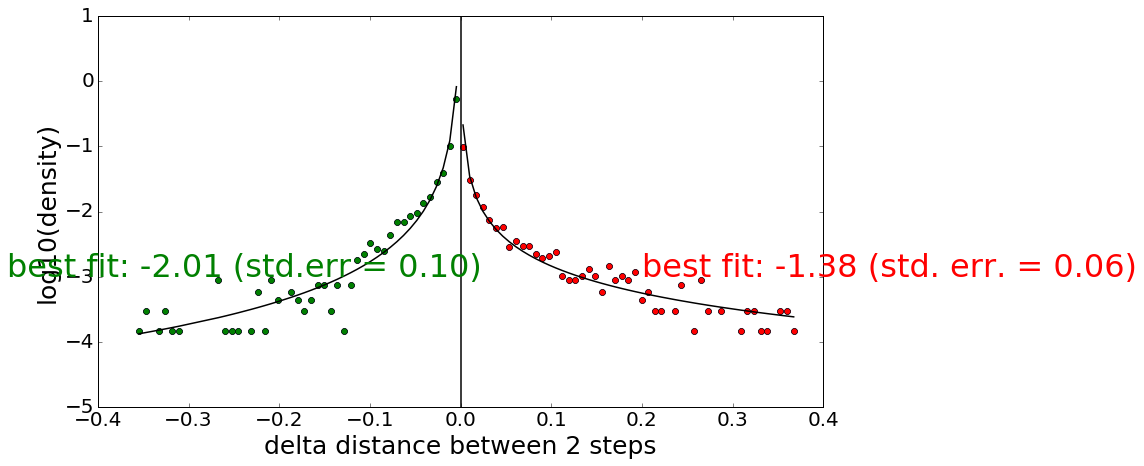

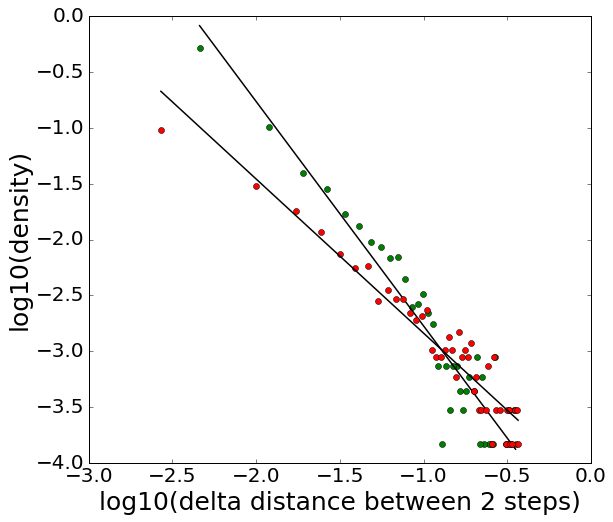

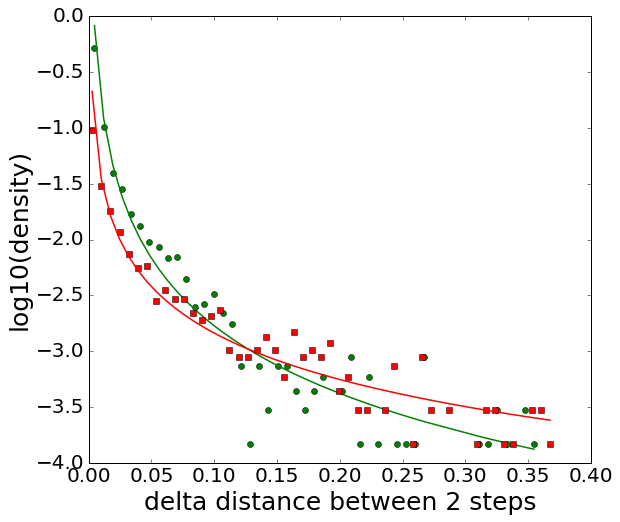

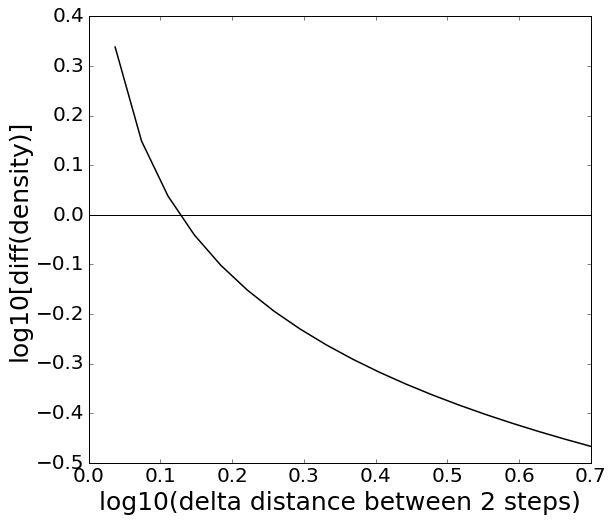

In [35]:
pl.figure(1,(13,7))
DF = DF[DF!=0]
H = pl.histogram(DF,bins = 100)
x = H[1][:-1]
print np.mean(x)
dSize = x[-1] - x[-2]
y = H[0]
c = y > 0
x = x[c]
y = y[c]
print x[np.argmax(y)],y[np.argmax(y)]/float(np.sum(y))
print np.mean(x)
y = y/float(np.sum(y))
ly = np.log10(y)
print np.min(ly),np.max(ly)
#pl.bar(x,ly -min(ly),dSize,bottom=np.min(ly))
pl.plot(x,ly,'bo')
pl.xlabel("delta distance between 2 steps")
pl.ylabel("log10(density)")

pl.figure(4,(9,8))
pl.xlabel("delta distance between 2 steps")
pl.ylabel("log10(density)")

#Fit negative part
#cMinus = (x < -0.0001)*(y > 0)
cMinus = (x > -1.3)*(x < 0)#*(y > 5e-10)
print "highest density", max(y),x[np.argmax(y)]
lx = np.log10(-x[cMinus])
ly = np.log10(y[cMinus])
print len(lx),len(ly)
fitNeg = S.linregress(lx,ly)

print fitNeg

pl.figure(2,(9,8))
#pl.subplot(121)
#pl.title("performance")

pl.plot(lx,ly,'go')
pl.plot(lx,lx*fitNeg[0] + fitNeg[1],'k-',lw=1.5)
pl.xlabel("log10(-delta distance between 2 steps)")
pl.ylabel("log10(density)")
#pl.text(-1.4,-2.5,"best fit: %.2f (std.err = %.2f)"%(fit[0],fit[4]),color="green")
pl.savefig(dir + "Figures/subplot1.eps")

pl.figure(1)
pl.plot(x[cMinus],ly,'go')
yFit = fitNeg[0]*np.log10(-x) + fitNeg[1]
pl.plot(x,yFit,'k-',lw=1.5)
pl.text(-0.5,-3,"best fit: %.2f (std.err = %.2f)"%(fitNeg[0],fitNeg[4]),color="green")

pl.figure(4)
pl.plot(-x[cMinus],ly,'go')
pl.plot(-x,yFit,'g-',lw=1.5)

pl.figure(2,(9,8))
#pl.title("counter performance")

#c = (x > 0.00)*(y > 5e-5)

c = (x > 0.00)*(y > 0)
lx = np.log10(x[c])
ly = np.log10(y[c])
print len(lx),len(ly)
fitPos = S.linregress(lx,ly)
print fitPos
pl.plot(lx,ly,'ro')
pl.plot(lx,lx*fitPos[0] + fitPos[1],'k-',lw=1.5)
pl.xlabel("log10(delta distance between 2 steps)")
pl.ylabel("log10(density)")
#pl.text(-2,-3,"best fit: %.2f (std. err. = %.2f)"%(fit[0],fit[4]),color="red")
pl.savefig(dir + "Figures/subplot2.eps")


pl.figure(1)
pl.plot(x[c],ly,'ro')
pl.plot(x,fitPos[0]*np.log10(x) + fitPos[1],'k-',lw=1.5)
pl.text(0.2,-3,"best fit: %.2f (std. err. = %.2f)"%(fitPos[0],fitPos[4]),color="red")
axY = np.linspace(-5,1,10)
pl.plot(np.zeros_like(axY),axY,'k-',lw=1.5)
pl.ylim(ymax=1)
pl.savefig(dir + "Figures/performance.eps")

pl.figure(4)
pl.plot(x[c],ly,'rs')
pl.plot(x,fitPos[0]*np.log10(x) + fitPos[1],'r-',lw=1.5)
pl.savefig(dir + "Figures/performance_superimpose.eps")

#print fitNeg
#print fitPos

pl.figure(5,(9,8))
x = np.linspace(0,0.7,20)
yPos = fitPos[0]*np.log10(x) + fitPos[1]
yNeg = fitNeg[0]*np.log10(x) + fitNeg[1]
ly = yNeg - yPos
print "diff:", fitNeg[0] - fitPos[0]
pl.plot(x,ly,'k-',lw=1.5)
pl.plot(x,np.zeros_like(x),'k-')

pl.xlabel("log10(delta distance between 2 steps)")
pl.ylabel("log10[diff(density)]")

In [11]:
simpl  = [float(x) for x in simpl]
x = np.arange(1,len(simpl)+1)
compl  = [float(x) for x in compl]

In [43]:
def prepareXY(filename,log=False):
    stringData = open(dir + "Data/%s.csv"%filename,'rb').read().split(",")
    Y = np.array([float(x) for x in stringData ])
    X = np.arange(1,len(Y)+1)
    
    if log:
        c = Y >0
        Y = np.log10(Y[c])
        X = np.log10(X[c])  
    return X,Y

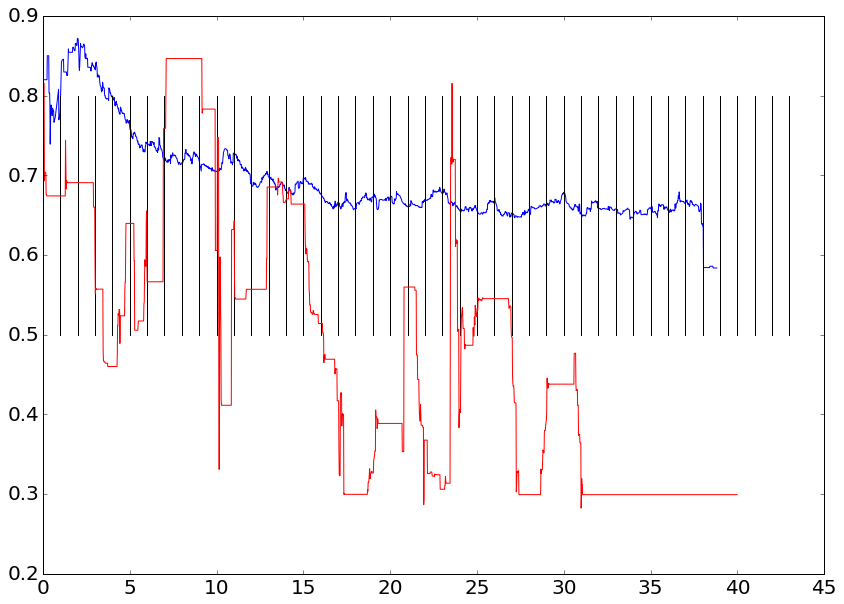

In [50]:
filename = complName
x,y = prepareXY(filename,log=False)
x = x/60.

pl.figure(1,(14,10))
pl.plot(x,y)

yline = np.linspace(0.5,0.8,10)


T = np.arange(0,44,1)
for i in T:
    xline = np.zeros_like(yline) + i
    pl.plot(xline,yline,'k-')
    
#pl.ylim(0.5,0.8)

pl.plot(learn13[:,0]/60.,learn13[:,1],'r-')

LinregressResult(slope=-0.093095490681215573, intercept=-0.1215610783049937, rvalue=-0.92191054796212424, pvalue=0.0, stderr=0.00078810173292323494)
LinregressResult(slope=-0.087805313813836827, intercept=-0.056609869121337364, rvalue=-0.94593012685034195, pvalue=0.0, stderr=0.00063237876503775435)


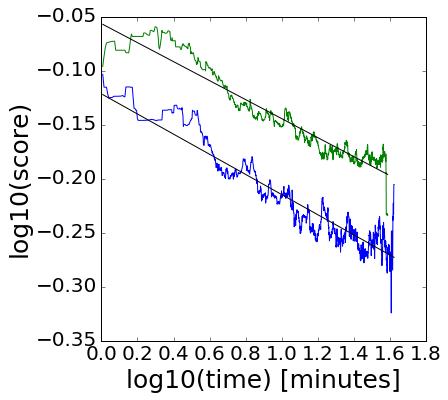

In [41]:
def plotFit(vector):
    '''Vector = {simpl,compl}'''
    y = np.array(map(float,vector))
    x = np.arange(1,len(vector)+1)/60.
    c = (x > 1)*(vector > 0)

    lx = np.log10(x[c])
    ly = np.log10(y[c])
    
    fit = S.linregress(lx,ly)
    print fit
    pl.plot(lx,ly)
    pl.plot(lx,lx*fit[0] + fit[1],'k-')
    
    pl.xlabel("log10(time) [minutes]")
    pl.ylabel("log10(score)")
    
    
plotFit(simpl)
plotFit(compl)

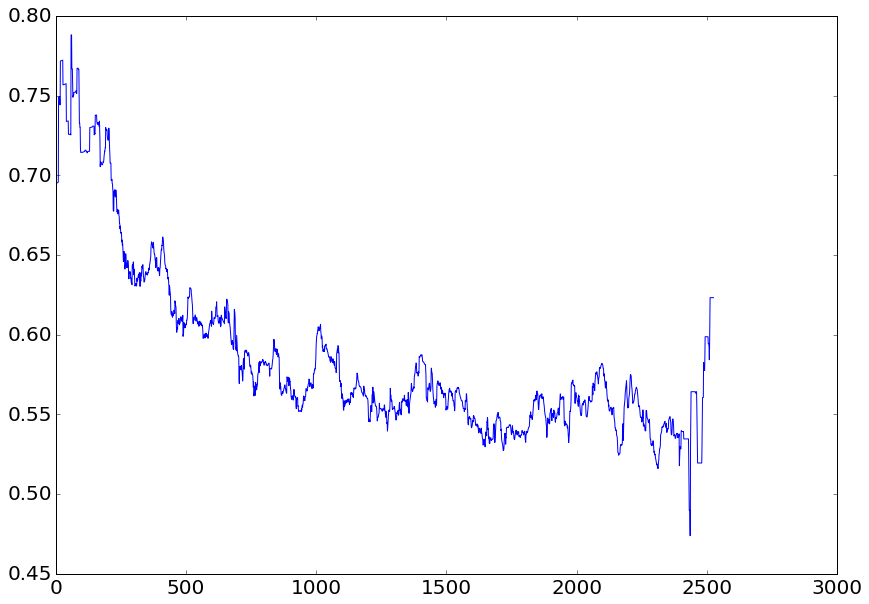

In [54]:
filename = simplName
#filename = complName
x,y = prepareXY(filename,log=False)
x = x

pl.figure(1,(14,10))
pl.plot(x,y)

LinregressResult(slope=-0.099231904315170108, intercept=-0.118934761891461, rvalue=-0.9177066135293126, pvalue=0.0, stderr=0.00088837997611386911)
LinregressResult(slope=-0.065564958781830551, intercept=-0.17085220267478948, rvalue=-0.86134899672024201, pvalue=0.0, stderr=0.00079973444168028433)


(0, 2500)

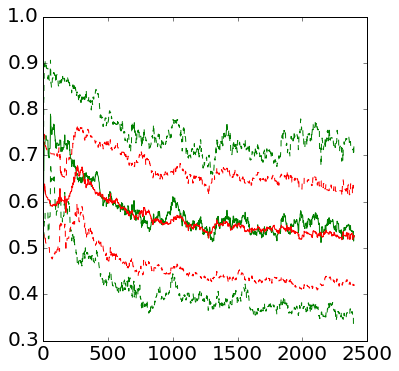

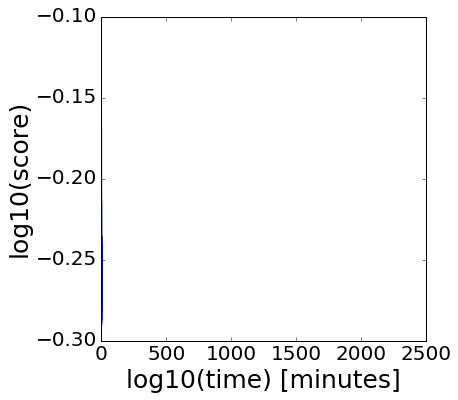

In [58]:
color = ["green","red"]
for k,kx  in enumerate([dfSimpleLearning,dfComplexLearning]):
    #array = np.array(dfSimpleLearning)
    array = np.array(kx)
    mean = []
    median = []
    std = []

    for i,ix in enumerate(array):
        cond = np.logical_not(np.isnan(ix))
        median = np.append(median,np.median(ix[cond]))
        mean  = np.append(mean,np.mean(ix[cond]))
        std = np.append(std,np.std(ix[cond]))

    #pl.plot(median)
    pl.figure(1)
    pl.plot(mean,color=color[k])
    pl.plot(mean+std,'--',color=color[k])
    pl.plot(mean-std,'--',color=color[k])

    pl.figure(2)
    plotFit(mean)
    
pl.xlim(0,2500)

LinregressResult(slope=-0.065564958781830551, intercept=-0.17085220267478948, rvalue=-0.86134899672024201, pvalue=0.0, stderr=0.00079973444168028433)


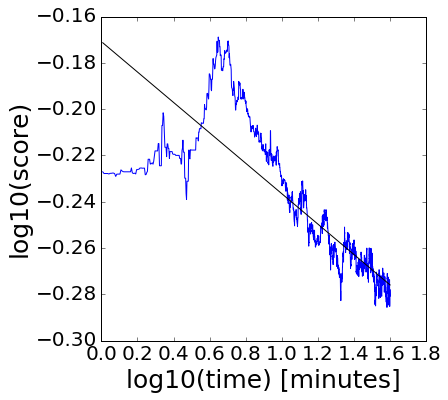

In [60]:
plotFit(mean)

(0, 2500)

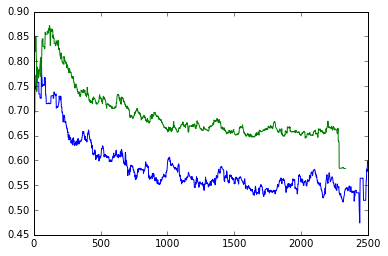

In [65]:
pl.plot(simpl)
pl.plot(compl)

pl.xlim(0,2500)

In [28]:
pandas.read_hdf(dir + 'Data/simpleConvergencesCubic.h5', 'table')

ImportError: HDFStore requires PyTables, "No module named tables" problem importing

In [11]:
import h5py

In [14]:
f = h5py.File(dir + 'Data/simpleConvergencesCubic.h5','r')

In [27]:
data = np.array(f['df']['axis0'].values())

AttributeError: 'Dataset' object has no attribute 'values'

In [33]:
f['df']['block0_items']

<HDF5 dataset "block0_items": shape (1,), type "|O8">